## Import dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut, KFold, cross_val_predict
from importlib import reload
import forward_stepwise

import warnings
warnings.filterwarnings("ignore")

## Read data

In [2]:
df_screening = pd.read_csv("../datasets/ligand_screening_with_descriptors.csv")

In [3]:
df_screening

,ligand_entry,SMILES,ligand_type,exp_yield,exp_ee,exp_deldelG,nbo_O1_cmc,nbo_C2_cmc,nbo_X3_cmc,nbo_C4_cmc,...,nbo_C6_fl,nbo_C7_fl,nbo_O8_fl,da_C2_X3_C4_N5_fl,s_C2_Bmin_fl,s_C2_Bmax_fl,s_C2_L_fl,s_C6_Bmin_fl,s_C6_Bmax_fl,s_C6_L_fl
0,EL1,O/C(C1=CC=CC=C1)=C\C2=N[C@@H](C3=CC=CC=C3)CO2,enol,38,51,-0.767382,-0.59364,0.45158,-0.46876,0.57509,...,-0.10286,-0.08133,-0.46983,1.361,2.01,5.51,6.40,2.19,9.17,6.45
1,EL2,OC(/C=C/C1=CC=CC=C1)=C\C2=N[C@@H](C3=CC=CC=C3)CO2,enol,15,59,-0.924118,-0.60208,0.41875,-0.45450,0.56917,...,-0.10380,-0.08142,-0.46985,0.911,2.11,5.36,8.55,2.24,11.37,6.45
2,AL1,O/C(C1=C(C)C=C(C)C=C1C)=N\C2=N[C@@H](C3=CC=CC=...,amide,53,58,-0.903386,-0.58734,0.64705,-0.60709,0.72135,...,-0.09850,-0.08365,-0.45507,1.036,2.27,5.86,7.45,2.40,10.72,6.45
3,AL2,O/C(C1=CC(OC)=C(OC)C(OC)=C1)=N\C2=N[C@@H](C3=C...,amide,29,44,-0.643971,-0.58789,0.63645,-0.60574,0.72121,...,-0.09782,-0.08018,-0.45545,0.535,2.88,5.41,8.35,2.41,10.39,6.45
4,AL3,O/C(C1=CC(C)=CC(C)=C1)=N\C2=N[C@@H](C3=CC=CC=C...,amide,23,59,-0.924118,-0.58384,0.63659,-0.60136,0.72176,...,-0.09814,-0.08013,-0.45482,0.340,2.19,5.36,6.45,2.32,9.98,6.45
5,AL4,O/C(C1=CC(C(C)(C)C)=CC(C(C)(C)C)=C1)=N\C2=N[C@...,amide,60,60,-0.945230,-0.58421,0.63998,-0.60274,0.72234,...,-0.09796,-0.08009,-0.45529,0.554,3.26,5.73,7.45,2.46,11.31,6.45
6,AL5,O/C(C1=CC(C)=C(C)C=C1)=N\C2=N[C@@H](C3=CC=CC=C...,amide,48,59,-0.924118,-0.58473,0.63584,-0.60250,0.72194,...,-0.09806,-0.07995,-0.45536,0.322,2.07,5.34,7.45,2.20,9.81,6.45
7,AL6,O/C(C(C)(C)C)=N\C1=N[C@@H](C2=CC=CC=C2)CO1,amide,22,44,-0.643971,-0.58721,0.68823,-0.62275,0.72551,...,-0.09868,-0.08055,-0.45389,0.188,2.84,5.36,4.20,2.32,7.92,6.45
8,AL7,O/C(C1=CC(OC)=C(OC)C(OC)=C1)=N\C2=N[C@@H](C(C)...,amide,28,37,-0.529684,-0.58940,0.63483,-0.60285,0.72546,...,-0.07120,-0.08820,-0.45646,0.731,2.89,5.42,8.35,2.81,10.48,4.25
9,AL8,O/C(C(C)(C)C)=N\C1=N[C@@H](C2=CC=CC=C2)[C@@H](...,amide,18,48,-0.713182,-0.60055,0.68589,-0.61347,0.73008,...,-0.08354,0.07205,-0.45811,0.490,2.84,7.14,4.20,2.35,7.78,6.45


In [4]:
non_features = ['ligand_entry', 'SMILES', 'ligand_type', 'exp_yield', 'exp_ee', 'exp_deldelG']  # non-features

In [5]:
df = df_screening[df_screening['exp_yield'] >= 10] # to eliminate the ligands with rexn. yield < 10%

In [6]:
X_train = df.drop(columns = non_features)  # storing features
y_train = df['exp_deldelG']  # storing label

In [7]:
corr_threshold = 0.9  # setting correlation threshold value

In [8]:
mask = np.abs(X_train.corr()) > corr_threshold

columns = np.full((mask.shape[0],), True, dtype = bool)

for i in range(mask.shape[0]):
    for j in range(i+1, mask.shape[0]):
        if mask.iloc[i,j]:
            if columns[j]:
                columns[j] = False

selected_columns = X_train.columns[columns]  # selecting features with corr below the threshold
df_features = X_train[selected_columns]

In [9]:
df_features.columns.tolist()  # features with corr below the threshold

['nbo_O1_cmc',
 'nbo_C2_cmc',
 'nbo_N5_cmc',
 'nbo_C6_cmc',
 'nbo_C7_cmc',
 'nbo_O8_cmc',
 'nbo_Co_cmc',
 'da_C2_X3_C4_N5_cmc',
 'bl_OCo_cmc',
 'bl_NCo_cmc',
 'vbur_Co_cmc',
 'vbur_oct2_cmc',
 'vbur_oct3_cmc',
 'vbur_oct4_cmc',
 'vbur_oct6_cmc',
 'vbur_oct7_cmc',
 'IE_cmc',
 'nbo_O/S1_fl',
 'da_C2_X3_C4_N5_fl',
 's_C2_Bmin_fl',
 's_C2_Bmax_fl',
 's_C2_L_fl',
 's_C6_Bmin_fl',
 's_C6_Bmax_fl',
 's_C6_L_fl']

In [10]:
# features with corr above the threshold
features_to_drop = list(set(X_train.columns.tolist()) - set(df_features.columns.tolist()))
features_to_drop

['nbo_N5_fl',
 'nbo_C2_fl',
 'nbo_O8_fl',
 'nbo_C4_fl',
 'nbo_X3_cmc',
 'nbo_C6_fl',
 'nbo_C7_fl',
 'ba_OCoN_cmc',
 'vbur_oct5_cmc',
 'nbo_X3_fl',
 'nbo_C4_cmc']

In [11]:
X_train_2 = df_features.copy(deep=True)
X_train_2.shape

(15, 25)

## Multivariate modeling

In [12]:
reload(forward_stepwise)  # see forward_stepwise.py file

<module 'forward_stepwise' from 'C:\\Users\\neera\\Desktop\\Data_&_scripts\\scripts\\forward_stepwise.py'>

In [13]:
top_models = forward_stepwise.forward_stepwise_model_selector(X_train_2, y_train, max_features=4)  # for number of features=4

Step 1:
Selected feature: da_C2_X3_C4_N5_cmc
Train MAE: 0.2626989405523811, Train R2: 0.07257585107469944
LOO MAE: 0.30812458766085754, 3-fold CV MAE: 0.3377110910777777
Selected features: da_C2_X3_C4_N5_cmc
Coefficients: [0.14631428]
Intercept: -1.0494690449553195

Step 2:
Selected feature: nbo_N5_cmc
Train MAE: 0.21560994717496249, Train R2: 0.4316521362982709
LOO MAE: 0.28315531105951514, 3-fold CV MAE: 0.33012230158479217
Selected features: da_C2_X3_C4_N5_cmc, nbo_N5_cmc
Coefficients: [ 0.1673218  15.70582145]
Intercept: 5.503847696156168

Step 3:
Selected feature: s_C6_Bmax_fl
Train MAE: 0.17551909773434488, Train R2: 0.5638325190975935
LOO MAE: 0.31144454968997565, 3-fold CV MAE: 0.32783539012891866
Selected features: da_C2_X3_C4_N5_cmc, nbo_N5_cmc, s_C6_Bmax_fl
Coefficients: [ 0.16726284 17.56419142 -0.12448286]
Intercept: 7.495603035604706

Step 4:
Selected feature: s_C6_Bmin_fl
Train MAE: 0.1546645914652929, Train R2: 0.6909681495242184
LOO MAE: 0.32306606779476793, 3-fold CV 

In [14]:
loo = LeaveOneOut()

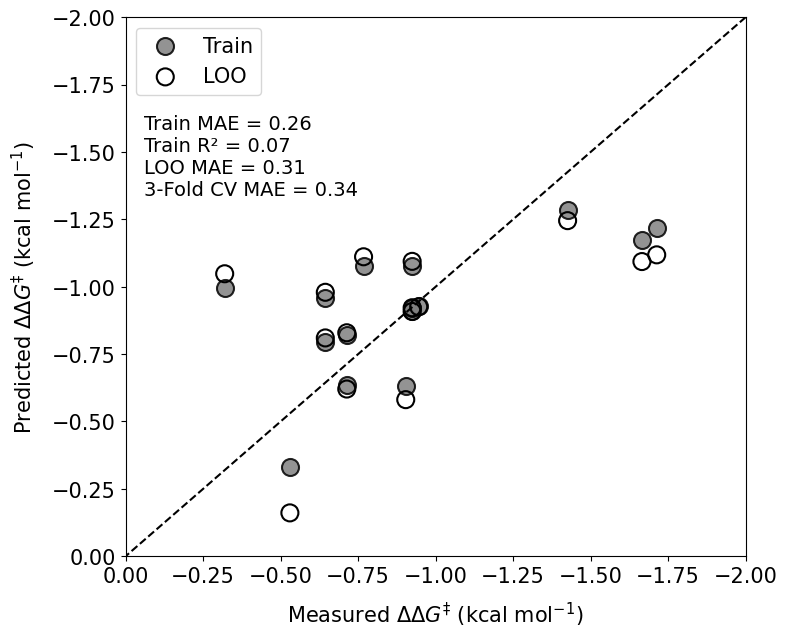

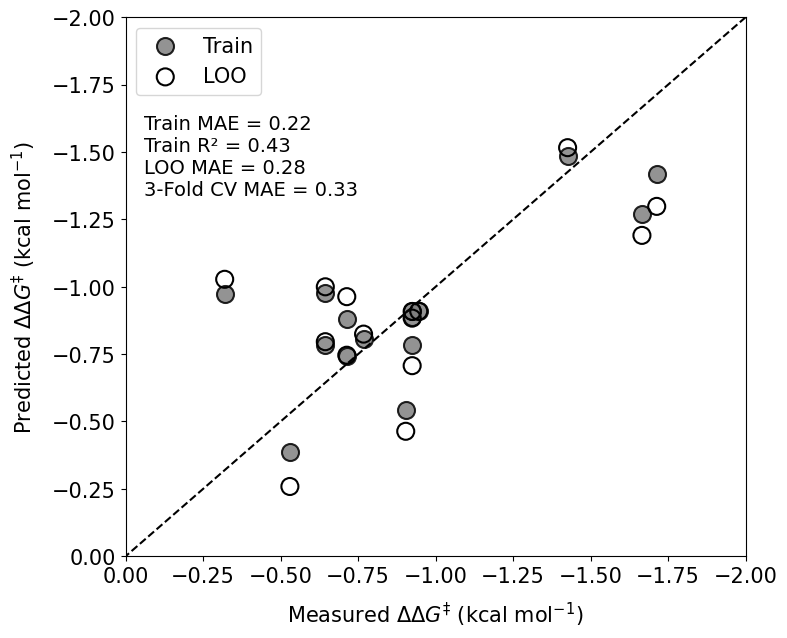

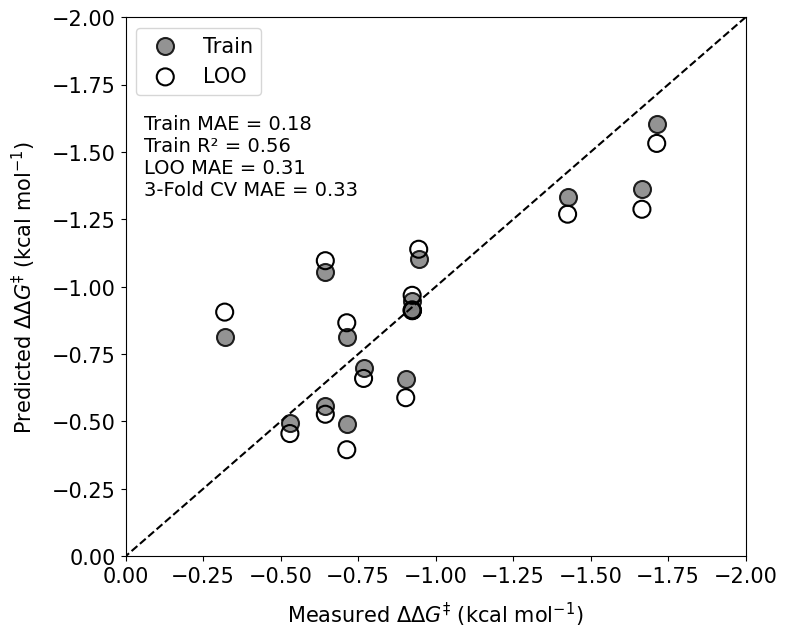

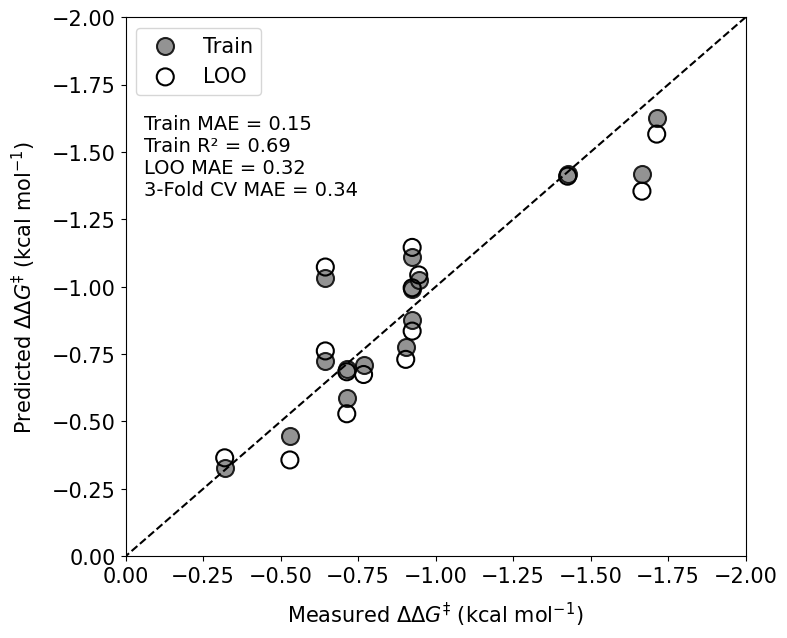

In [15]:
# for each model in top_models
for step, (mae_train, r2_train, mae_loo, mae_3fold, model, subset_indices, subset_names) in enumerate(top_models):
    X_train_subset = X_train_2[subset_names]

    y_train_pred = model.predict(X_train_subset)  # predictions for train set

    y_train_loo = cross_val_predict(model, X_train_subset, y_train, cv=loo)  # predictions for Leave-one-out (LOO) samples

    plt.figure(figsize=(8, 7))

    plt.scatter(y_train, y_train_pred,
                s=150, linewidths=1.5, facecolor='grey', edgecolors='k', alpha=0.85, label='Train')  # train plot

    plt.scatter(y_train, y_train_loo, linewidths=1.5, facecolors='none', edgecolors='k', label='LOO', s=150)  # LOO plot

    plt.plot([-2.0, 0.0], [-2.0, 0.0], 'k--', lw=1.5)  # ideal reference line

    plt.xlabel(r'Measured $ΔΔG^{‡}$ (kcal mol$^{-1}$)', fontsize=15, labelpad=10)
    plt.ylabel(r'Predicted $ΔΔG^{‡}$ (kcal mol$^{-1}$)', fontsize=15, labelpad=10)

    plt.xlim(-2.0, 0.0)
    plt.ylim(-2.0, 0.0)
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()

    plt.tick_params(axis='both', which='major', labelsize=15)

    # Metrics text on the plot
    metrics_text = (f"Train MAE = {mae_train:.2f}\n"
                    f"Train R² = {r2_train:.2f}\n"
                    f"LOO MAE = {mae_loo:.2f}\n"
                    f"3-Fold CV MAE = {mae_3fold:.2f}")
    plt.text(0.03, 0.82, metrics_text, fontsize=14, verticalalignment='top', transform=plt.gca().transAxes)
        
    plt.legend(facecolor="white", fontsize=15, loc='upper left')
    plt.grid(False)

    plt.savefig(f'model{step+1}.png', dpi=300, bbox_inches='tight')

    plt.show()

## Model extrapolation

In [16]:
df_external = pd.read_csv("../datasets/extrapolation_set.csv")

In [17]:
df_external

,ligand_entry,SMILES,ligand_type,nbo_O1_cmc,nbo_C2_cmc,nbo_X3_cmc,nbo_C4_cmc,nbo_N5_cmc,nbo_C6_cmc,nbo_C7_cmc,...,nbo_C6_fl,nbo_C7_fl,nbo_O8_fl,da_C2_X3_C4_N5_fl,s_C2_Bmin_fl,s_C2_Bmax_fl,s_C2_L_fl,s_C6_Bmin_fl,s_C6_Bmax_fl,s_C6_L_fl
0,UL1_quinolin,O/C(NC1=CC=CC=C1)=N\C2=N[C@@H](C3=CC=CC=C3)CO2,urea,-0.61906,0.76212,-0.63528,0.72707,-0.42769,-0.09153,-0.08444,...,-0.09466,-0.08122,-0.45667,-1.029,1.84,5.96,6.7,2.28,9.89,6.45
1,UL1_3-Methylquinolin,O/C(NC1=CC=CC=C1)=N\C2=N[C@@H](C3=CC=CC=C3)CO0,urea,-0.61887,0.76222,-0.63585,0.72653,-0.42743,-0.09165,-0.08444,...,-0.09466,-0.08122,-0.45667,-1.029,1.84,5.96,6.7,2.28,9.89,6.45
2,UL1_4-Methylquinolin,O/C(NC1=CC=CC=C1)=N\C2=N[C@@H](C3=CC=CC=C3)CO1,urea,-0.61900,0.76365,-0.63507,0.72751,-0.42756,-0.09220,-0.08405,...,-0.09466,-0.08122,-0.45667,-1.029,1.84,5.96,6.7,2.28,9.89,6.45
3,UL1_7-Methylquinolin,O/C(NC1=CC=CC=C1)=N\C2=N[C@@H](C3=CC=CC=C3)CO2,urea,-0.62064,0.76379,-0.63390,0.72795,-0.42808,-0.09638,-0.08370,...,-0.09466,-0.08122,-0.45667,-1.029,1.84,5.96,6.7,2.28,9.89,6.45


In [18]:
fourth_model_info = top_models[3]  # to access the best four-feature model

# model extraction and feature selection
model = fourth_model_info[4]
selected_features = fourth_model_info[6]

X_external = df_external[selected_features]  # extracting the corresponding features from the external set

y_external_pred = model.predict(X_external)  # external set prediction

print(y_external_pred)

[-1.46519759 -1.46998337 -1.51808374 -1.62342129]


In [19]:
# constants (unit)
R = 1.987  # cal/mol/K
T = 343.15  # K (temperature from the training/ligand screeinig data)

deldelG_pred = y_external_pred  # predicted ΔΔG‡ values in kcal/mol
deldelG_pred_cal = deldelG_pred * 1000  # kcal/mol to cal/mol

enantiomeric_ratio = np.exp(-deldelG_pred_cal / (R * T))  # for enantiomeric ratio
enantiomeric_excess = (enantiomeric_ratio - 1) / (enantiomeric_ratio + 1) * 100  # for enantiomeric excess

# results for each ligand
for i, (deldelG, er, ee) in enumerate(zip(deldelG_pred, enantiomeric_ratio, enantiomeric_excess)):
    print(f"Prediction {i + 1}:")
    print(f"ΔΔG‡ (kcal/mol): {deldelG:.2f}")
    print(f"Enantiomeric Ratio (e.r.): {er:.2f}")
    print(f"Enantiomeric Excess (e.e.): {ee:.2f}%\n")


Prediction 1:
ΔΔG‡ (kcal/mol): -1.47
Enantiomeric Ratio (e.r.): 8.58
Enantiomeric Excess (e.e.): 79.11%

Prediction 2:
ΔΔG‡ (kcal/mol): -1.47
Enantiomeric Ratio (e.r.): 8.64
Enantiomeric Excess (e.e.): 79.24%

Prediction 3:
ΔΔG‡ (kcal/mol): -1.52
Enantiomeric Ratio (e.r.): 9.27
Enantiomeric Excess (e.e.): 80.52%

Prediction 4:
ΔΔG‡ (kcal/mol): -1.62
Enantiomeric Ratio (e.r.): 10.82
Enantiomeric Excess (e.e.): 83.07%



Predicted Train Samples:
[-0.70761231 -0.8758033  -0.77545968 -1.03376133 -0.98965675 -1.02394769
 -1.10839395 -0.72365626 -0.44503544 -0.58816577 -0.32878888 -1.62500058
 -1.41798033 -0.69552326 -1.4167411 ]

Predicted LOO Samples:
[-0.67414472 -0.83516626 -0.73030281 -1.07293848 -0.99588643 -1.04366948
 -1.1457829  -0.76165955 -0.35707089 -0.5284436  -0.36499183 -1.56613008
 -1.3543719  -0.68428522 -1.41002418]

Predicted 3-Fold Samples:
[-0.64364619 -0.82153445 -0.75206599 -1.04995022 -0.98759967 -1.03536844
 -1.14073593 -0.72898301 -0.40119336 -0.58676273 -0.12874962 -0.94421802
 -0.9225694  -0.38714145 -0.75281153]


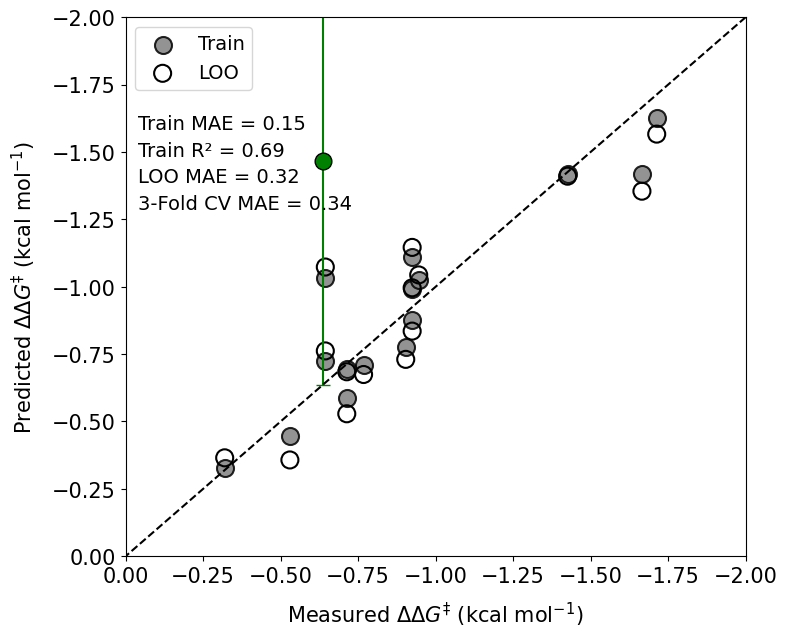

In [20]:
# for plotting with new predictions

second_model_info = top_models[3]
model = second_model_info[4]
selected_features = second_model_info[6]

X_train_subset = X_train_2[selected_features] 
y_train_pred = model.predict(X_train_subset)

loo = LeaveOneOut()
y_train_loo = cross_val_predict(model, X_train_subset, y_train, cv=loo)

kf = KFold(n_splits=3)
y_train_3fold = cross_val_predict(model, X_train_subset, y_train, cv=kf)

X_external = df_external.iloc[[0]][selected_features]  # for UL1 from ligand screeining conditions
y_test_pred = model.predict(X_external)  # for UL1 from ligand screeining conditions

y_test_actual = df_external.iloc[0, 5]  # measured ΔΔG‡ for UL1

error_margins = abs(y_test_pred - y_test_actual)  # error bar

# for individual predictions
print("Predicted Train Samples:")
print(y_train_pred)
print("\nPredicted LOO Samples:")
print(y_train_loo)
print("\nPredicted 3-Fold Samples:")
print(y_train_3fold)

plt.figure(figsize=(8, 7))

plt.scatter(y_train, y_train_pred, s=150, linewidths=1.5, facecolor='grey', edgecolors='k', alpha=0.85, label='Train')


plt.scatter(y_train, y_train_loo, linewidths=1.5, facecolors='none', edgecolors='k', label='LOO', s=150)

# for external set with error bars
plt.errorbar(y_test_actual, y_test_pred, yerr=error_margins, fmt='o',
             color='green', ecolor='green', elinewidth=1.5, capsize=5,
             markersize=12, markeredgecolor='k', markerfacecolor='green')

plt.plot([-2.0, 0.0], [-2.0, 0.0], 'k--', lw=1.5)  # ideal reference line

plt.xlabel(r'Measured $ΔΔG^{‡}$ (kcal mol$^{-1}$)', fontsize=15, labelpad=10)
plt.ylabel(r'Predicted $ΔΔG^{‡}$ (kcal mol$^{-1}$)', fontsize=15, labelpad=10)

plt.xlim(-2.0, 0.0)
plt.ylim(-2.0, 0.0)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.tick_params(axis='both', which='major', labelsize=15)

metrics_text = (f"Train MAE = {second_model_info[0]:.2f}\n"
                f"Train R² = {second_model_info[1]:.2f}\n"
                f"LOO MAE = {second_model_info[2]:.2f}\n"
                f"3-Fold CV MAE = {second_model_info[3]:.2f}")
plt.text(0.02, 0.82, metrics_text, fontsize=14, verticalalignment='top', linespacing=1.5, transform=plt.gca().transAxes)

plt.legend(facecolor="white", fontsize=14, loc='upper left')
plt.grid(False)

plt.savefig('final_model_with_external.png', dpi=300, bbox_inches='tight')

plt.show()

In [21]:
# constants (unit)
R = 1.987  # cal/mol/K
T = 333.15  # K (temperature from the optimized/scope data)

deldelG_pred = y_external_pred  # predicted ΔΔG‡ values in kcal/mol
deldelG_pred_cal = deldelG_pred * 1000  # kcal/mol to cal/mol

enantiomeric_ratio = np.exp(-deldelG_pred_cal / (R * T))  # for enantiomeric ratio
enantiomeric_excess = (enantiomeric_ratio - 1) / (enantiomeric_ratio + 1) * 100  # for enantiomeric excess

# results for each ligand
for i, (deldelG, er, ee) in enumerate(zip(deldelG_pred, enantiomeric_ratio, enantiomeric_excess)):
    print(f"Prediction {i + 1}:")
    print(f"ΔΔG‡ (kcal/mol): {deldelG:.2f}")
    print(f"Enantiomeric Ratio (e.r.): {er:.2f}")
    print(f"Enantiomeric Excess (e.e.): {ee:.2f}%\n")


Prediction 1:
ΔΔG‡ (kcal/mol): -1.47
Enantiomeric Ratio (e.r.): 9.15
Enantiomeric Excess (e.e.): 80.29%

Prediction 2:
ΔΔG‡ (kcal/mol): -1.47
Enantiomeric Ratio (e.r.): 9.21
Enantiomeric Excess (e.e.): 80.42%

Prediction 3:
ΔΔG‡ (kcal/mol): -1.52
Enantiomeric Ratio (e.r.): 9.91
Enantiomeric Excess (e.e.): 81.66%

Prediction 4:
ΔΔG‡ (kcal/mol): -1.62
Enantiomeric Ratio (e.r.): 11.62
Enantiomeric Excess (e.e.): 84.15%



In [22]:
# on standardized scale

selected_features = fourth_model_info[6] 
X_train_subset = X_train_2[selected_features]

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train_subset)

model_standardized = model.fit(X_train_standardized, y_train)

# model coefficients and intercept
coefficients_standardized = model_standardized.coef_
intercept_standardized = model_standardized.intercept_

print(f"Standardized Model: {coefficients_standardized[0]:.4f} * {selected_features[0]} + {coefficients_standardized[1]:.4f} * {selected_features[1]} + {coefficients_standardized[2]:.4f} * {selected_features[2]} + {coefficients_standardized[3]:.4f} * {selected_features[3]}")
print(f"Intercept: {intercept_standardized:.4f}")

Standardized Model: 0.1581 * da_C2_X3_C4_N5_cmc + 0.2369 * nbo_N5_cmc + -0.1336 * s_C6_Bmax_fl + 0.2180 * s_C6_Bmin_fl
Intercept: -0.9170
